In [132]:
# -*- coding: utf-8 -*-
%matplotlib inline


import matplotlib
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from twnews.utils.memoize import load
from twnews.utils.text_processors import to_unicode, is_word
from nltk.tokenize import word_tokenize

dataset = load('dataset')
stopwords = stopwords.words('russian')

In [157]:
def split_text(text):
    text = to_unicode(text)
    words = word_tokenize(text)
    words = filter(is_word, words)    
    words = filter(lambda x: x not in stopwords, words)
    return set(words)

tweets = dataset.tweets.get_dataset_texts()
news = dataset.news.get_dataset_texts()
print len(tweets), len(news)

# tweets_dict = {}
# for tweet in tweets:
#     tweets_dict[tweet] = split_text(tweet.text)
    
# news_dict = {}
# for single_news in news:
#     news_dict[single_news] = split_text(single_news.title)

4324 13711


In [255]:
def prnt(l):
    for x,s in l:
        print '\t', x, len(s)

        
intersection_lengths = []
intersection_lengths_normalized_by_news = []
intersection_lengths_normalized_by_tweets = []
for tweet in tweets:
    #print tweet
    tweet_words = split_text(tweet.text)
    
    news_found = False
    for url in tweet.urls:
        if dataset.news.exists(url):
            single_news = dataset.news.get(url)
            single_news_words = split_text(single_news.title)
            # print '\t',single_news, len(tweet_words.intersection(single_news_words))
            length = len(tweet_words.intersection(single_news_words))
            #if len(single_news_words) <= len(tweet_words):#length*1.0/len(single_news_words) != 1.0:
            intersection_lengths.append(length)
            intersection_lengths_normalized_by_news.append(length*1.0/len(single_news_words))
            #intersection_lengths_normalized_by_tweets.append(length*1.0/len(tweet_words))
            news_found = True
            break
            #break
    if not news_found:
        raise Exception(tweet)
        
print len(intersection_lengths)
print len([ x for x in intersection_lengths_normalized_by_news if x < 1.0])

    #if (i+1)%10 == 0:
#        break
#print intersection_lengths


4324
1242


In [256]:
# hist = {}
# for x in intersection_lengths:
#     hist[x] = hist[x]+1 if x in hist else 1

# x = hist.keys()
# y = hist.values()
# plt.xlabel('Smarts')
# plt.ylabel('Probability')
# plt.title('Histogram of IQ')

# plt.vlines(x, [0], y, 'g', linewidth=10)
# plt.title('asd')
# plt.axis([-1, max(x)+1, 0, max(y)+0.1*max(y)])
# plt.show()

(array([  291.,   115.,   134.,   728.,   877.,  1019.,  1025.,   101.,
           25.,     9.]),
 array([  0. ,   1.3,   2.6,   3.9,   5.2,   6.5,   7.8,   9.1,  10.4,
         11.7,  13. ]),
 <a list of 10 Patch objects>)

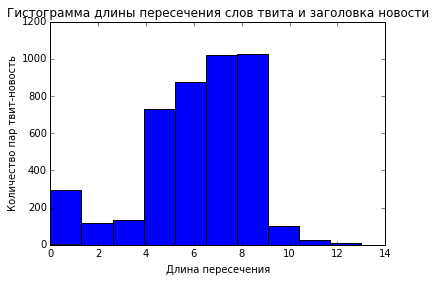

In [257]:
plt.title(u'Гистограмма длины пересечения слов твита и заголовка новости')
plt.xlabel(u'Длина пересечения')
plt.ylabel(u'Количество пар твит-новость')

plt.hist(intersection_lengths)


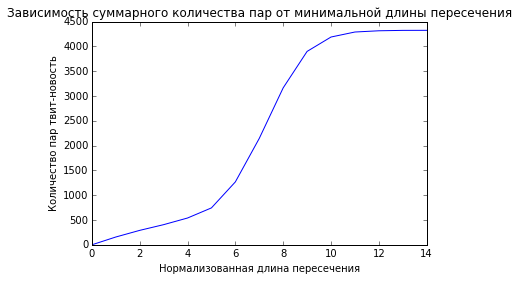

In [258]:
import numpy as np
X = np.arange(0,15,1)
Y = [len(filter(lambda score: score < x, intersection_lengths)) for x in X]
plt.title(u'Зависимость суммарного количества пар от минимальной длины пересечения')
plt.xlabel(u'Нормализованная длина пересечения')
plt.ylabel(u'Количество пар твит-новость')
plt.plot(X,Y)

(array([  159.,    80.,   120.,    72.,    49.,   121.,    78.,   137.,
          390.,  3118.]),
 array([ 0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ]),
 <a list of 10 Patch objects>)

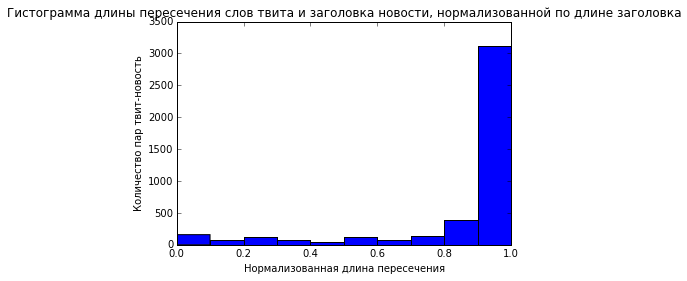

In [259]:
plt.title(u'Гистограмма длины пересечения слов твита и заголовка новости, нормализованной по длине заголовка')
plt.xlabel(u'Нормализованная длина пересечения')
plt.ylabel(u'Количество пар твит-новость')

plt.hist(intersection_lengths_normalized_by_news)

In [260]:
# plt.title(u'Гистограмма длины пересечения слов твита и заголовка новости, нормализованной по длине твита')
# plt.xlabel(u'Нормализованная длина пересечения')
# plt.ylabel(u'Количество пар твит-новость')

# plt.hist(intersection_lengths_normalized_by_tweets)

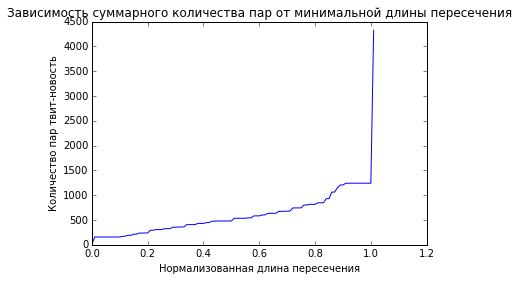

In [261]:
import numpy as np
X = np.arange(0,1.02,0.01)
Y = [len(filter(lambda score: score < x, intersection_lengths_normalized_by_news)) for x in X]
plt.title(u'Зависимость суммарного количества пар от минимальной длины пересечения')
plt.xlabel(u'Нормализованная длина пересечения')
plt.ylabel(u'Количество пар твит-новость')
plt.plot(X,Y)

In [287]:
def prnt(l):
    for x,s in l:
        print '\t', x, len(s)

        
intersection_lengths = []
unique_tweets = []
unique_tweets_normalized_by_tweets = []
for tweet in tweets:
    #print tweet
    tweet_words = split_text(tweet.text)
    
    news_found = False
    for url in tweet.urls:
        if dataset.news.exists(url):
            single_news = dataset.news.get(url)
            single_news_words = split_text(single_news.title)
            #length = len([word for word in tweet_words if word in single_news_words])
            unique_tweets_length = len([word for word in tweet_words if word not in single_news_words])
            unique_tweets.append(unique_tweets_length)
            unique_tweets_normalized_by_tweets.append(unique_tweets_length*1.0/len(tweet_words))
            news_found = True
            
    if not news_found:
        raise Exception(tweet)
        
print len(unique_tweets)
print len(unique_tweets_normalized_by_tweets)
#print len([ x for x in intersection_lengths_normalized_by_tweets if x < 1.0])
print len([x for x in unique_tweets if x == 0])

4341
4341
1644


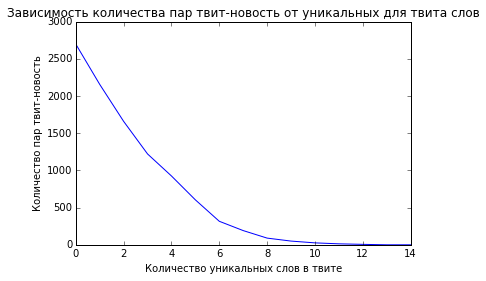

In [301]:
import numpy as np
X = np.arange(0,15,1)
Y = [len(filter(lambda score: score > x, unique_tweets)) for x in X]
plt.title(u'Зависимость суммарного количества пар твит-новость от уникальных для твита слов')
plt.xlabel(u'Количество уникальных слов в твите')
plt.ylabel(u'Количество пар твит-новость')
plt.plot(X,Y)

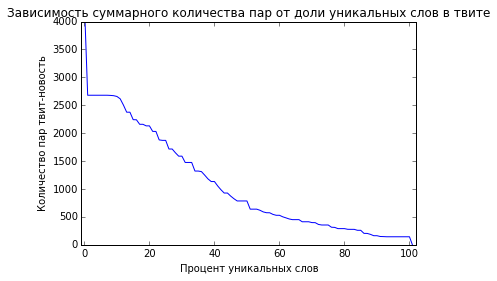

In [302]:
import numpy as np
X = np.arange(0,1.02,0.01)
Y = [len(filter(lambda score: score < x, unique_tweets_normalized_by_tweets)) for x in X]
X = map(lambda x: x*100, X)
Y = map(lambda y: len(tweets)-y,Y)
plt.plot(X,Y)

plt.axis([-1, 102, -1, 4000])
plt.title(u'Зависимость суммарного количества пар от доли уникальных слов в твите')
plt.xlabel(u'Процент уникальных слов')
plt.ylabel(u'Количество пар твит-новость')

# plt.hist(map(lambda x: x*100, unique_tweets_normalized_by_tweets), 20)